In [27]:
# Import system and OS modules to manage Python paths and file locations
import sys
import os

# Get the project root (two folders above the current working directory)
root = os.path.abspath(os.path.join(os.getcwd(), "../../")) 

# Add the project root to Python's search path if not already there
if root not in sys.path: 
    sys.path.insert(0, root)

# Now import everything from pybootnet.py inside the libs folder
from libs.pybootnet import *


In [28]:
# Load the ARG and MAG feature tables 
featuretable1 = pd.read_csv("../../Data/Dataset2/ARG_rclr_dataset2_with_column_names.csv")
featuretable2 = pd.read_csv("../../Data/Dataset2/MAG_rclr_dataset2_with_column_names.csv")

In [29]:
#Clean SampleID column to merge correctly
for df in [featuretable1, featuretable2]:
    df['SampleID'] = df['SampleID'].str.strip()
    
# Merging two feature tables
def merge_diff_networks(featuretable1, featuretable2):
    # First extracting the column names from each feature table, excluding SampleID
    featuretable1_columns_names = []
    for col in featuretable1.columns:
        if col != 'SampleID':
            featuretable1_columns_names.append(col)
            #print("Dataset1 features:", featuretable1_columns_names)

    featuretable2_columns_names = []
    for col in featuretable2.columns:
        if col != 'SampleID':
            featuretable2_columns_names.append(col)
            #print("Dataset2 features:", featuretable2_columns_names)

    # Next, merging the two feature tables using SampleID as the joining column
    merged_data = pd.merge(featuretable1, featuretable2, on='SampleID', how='inner')
    
    merged_data["Category"] = "TJ_River"
    cols = merged_data.columns.tolist()
    cols = ["SampleID", "Category"] + [c for c in merged_data.columns if c not in ["SampleID", "Category"]]
    merged_data = merged_data[cols]
    

    return featuretable1_columns_names, featuretable2_columns_names, merged_data

In [30]:
# Call the merge function
dataset1_feature_names, dataset2_feature_names, merged_data = merge_diff_networks(featuretable1,featuretable2)


In [31]:
# Save merged dataset
merged_data.to_csv(
    "../../Output/Dataset2/merged_ARGs_CDS_and_MAG_featuretable.tsv",
    sep="\t",
    index=False
)

In [32]:
# Read the merged_ARG_and_MAG_featuretables.tsv file
merged_data = pd.read_csv('../../Output/Dataset2/merged_ARGs_CDS_and_MAG_featuretable.tsv', sep="\t")
merged_data


,SampleID,Category,tet(47),ANT(9)-Ib,lin,DHA-31,OXA-1163,ANT(4')-Ia,KPC-172,BJP-1,...,Allorhizobium (G) 312,Lentimonas (G) 295,Azotimanducaceae_A (F) 309,Unclassified Bacteria (D) 254,Unclassified Bacteria (D) 270,Unclassified Bacteria (D) 258,JALRLI01 (G) 212,Planktothricoides (G) 288,SAT41 (F) 260,CANHHI01 (F) 273
0,10_S15,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,0.284019,0.284019,-2.443865,-2.443865,...,-2.618625,-0.429822,-0.590677,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
1,12_S16,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,...,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
2,13_S17,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,...,-0.692841,-2.618625,-1.738447,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
3,14_S18,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,...,-2.618625,-1.631095,-1.463107,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
4,1_S6,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,-2.443865,...,-0.848803,-0.203793,-0.852241,0.699851,0.665206,0.664964,0.647126,0.596063,0.370093,0.141570
5,3_S8,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,1.436670,0.520380,-0.983698,-2.443865,...,-0.487351,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
6,4_S9,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,1.811620,0.921762,-2.443865,-2.443865,...,-1.262880,-1.545823,-1.204698,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
7,5_S10,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,2.183515,-0.147241,-2.443865,-2.443865,...,-0.745760,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
8,6_S11,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,0.860156,-2.443865,-2.443865,-2.443865,...,-2.618625,-0.342650,-0.289566,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625
9,7_S12,TJ_River,-2.443865,-2.443865,-2.443865,-2.443865,1.560425,0.962588,-2.443865,-2.443865,...,-1.421113,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625,-2.618625


In [33]:
#Create bootstrap replicates of the merged data
create_bootstrap = bootstrap_replicates(merged_data, 500) 


In [34]:
# After merging the feature tables, create a correlatation matrix with the merged table
# Only interested in correlations between features from different tables, not within the same table
# Set any correlations between features within the same table equal to 0
# The return matrix should only contain values between features from different tables, while the remaining should be 0

def different_network_correlation_matrix(data_list, dataset1_feature_names, dataset2_feature_names):
    matrix_list = []

    for data in data_list:
        correlations = data.corr(method='spearman', numeric_only=True)

        # Set within dataset1 correlations to 0
        correlations.loc[dataset1_feature_names, dataset1_feature_names] = 0

        # Set within dataset2 correlations to 0
        correlations.loc[dataset2_feature_names, dataset2_feature_names] = 0

        # Keeping only dataset1/dataset2 correlations
        correlations.loc[dataset1_feature_names, dataset2_feature_names]

        matrix_list.append(correlations)

    return matrix_list


In [35]:
# Call the correlation function
matrix_list = different_network_correlation_matrix(
    create_bootstrap,
    dataset1_feature_names,
    dataset2_feature_names
)

In [36]:
# Save correlation matrices
matrix_list[0].to_csv(
    "../../Output/Dataset2/correlation_matrix_ARGs_and_MAGs_dataset2.tsv",
    sep="\t"
) 

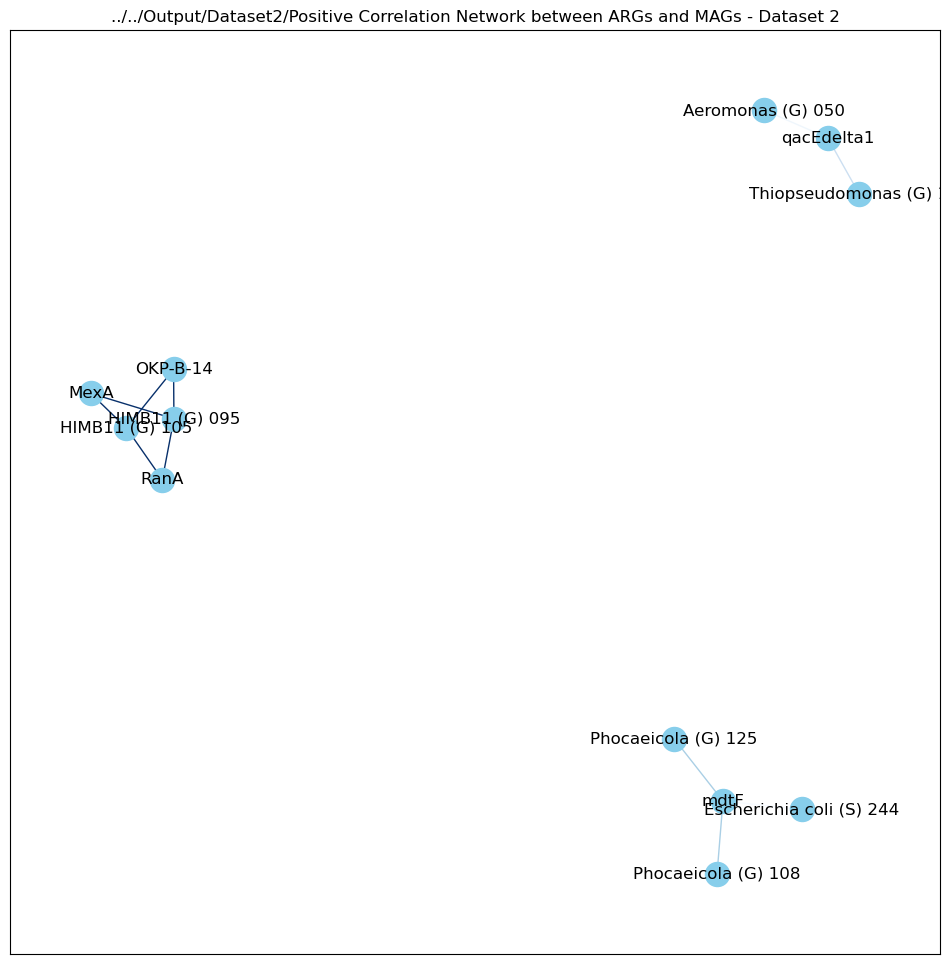

In [37]:
##### build only positive correlations
G=build_positive_network(matrix_list, 0.95, title="../../Output/Dataset2/Positive Correlation Network between ARGs and MAGs - Dataset 2")

In [38]:
TJ_River_stat = calculate_network_statistics(matrix_list, 0.85)

In [39]:
project_stats = {
    'TJ_River' : TJ_River_stat
}

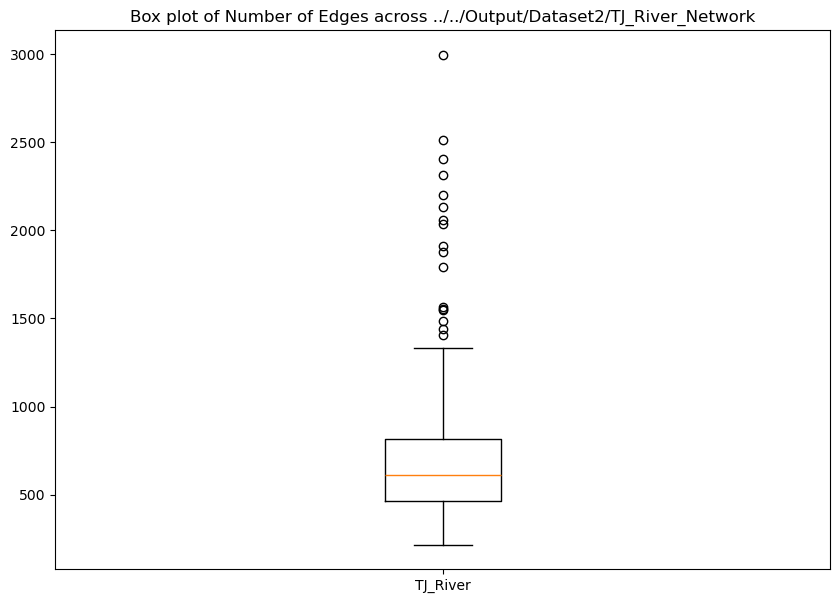

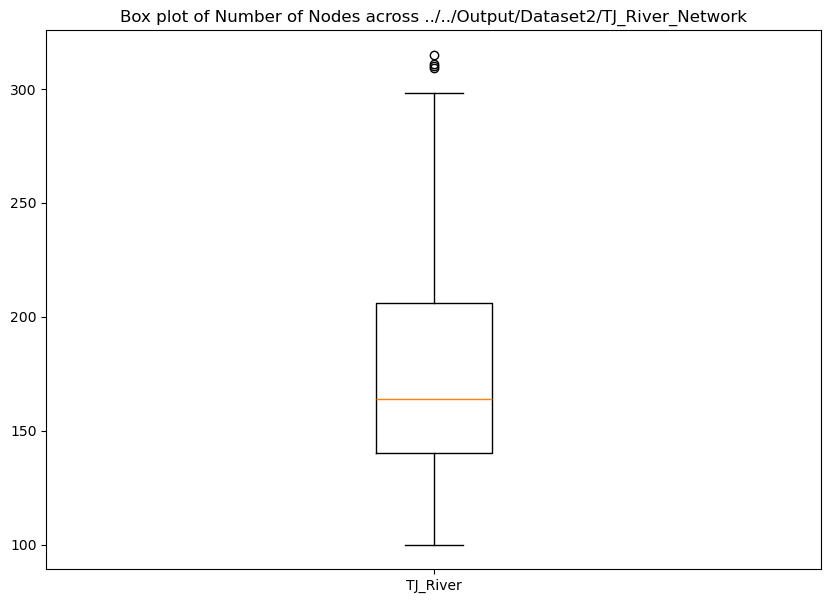

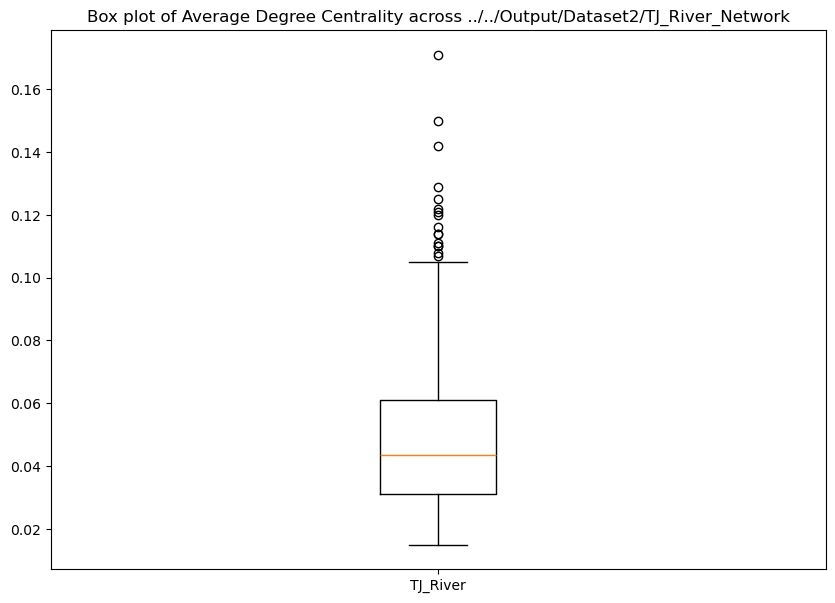

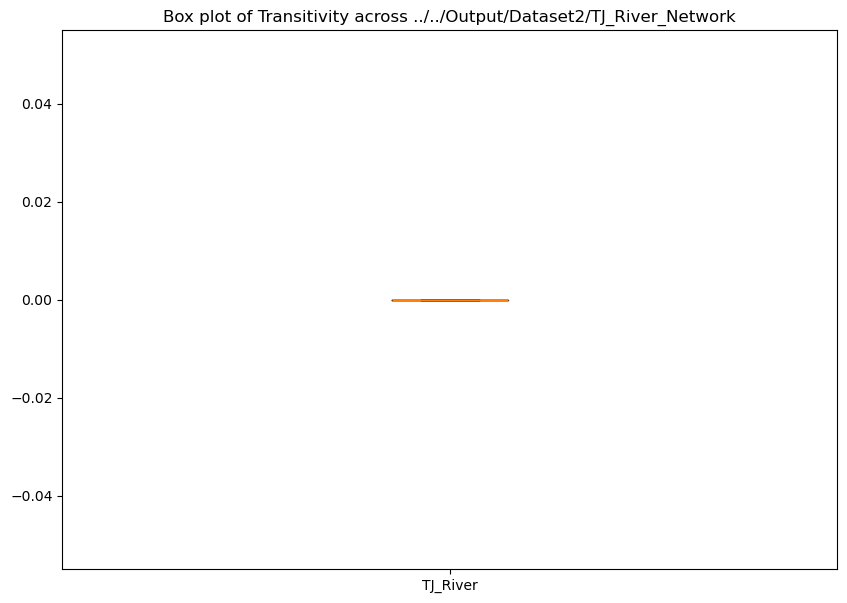

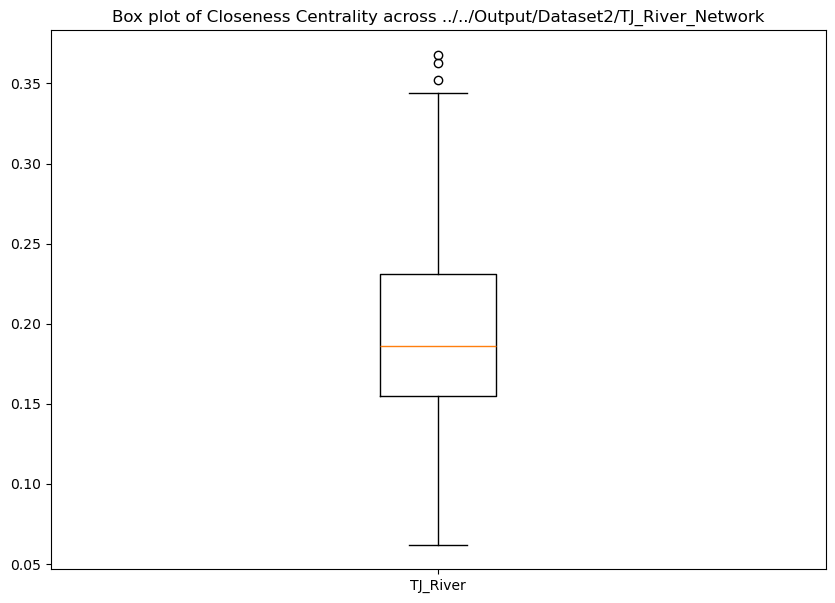

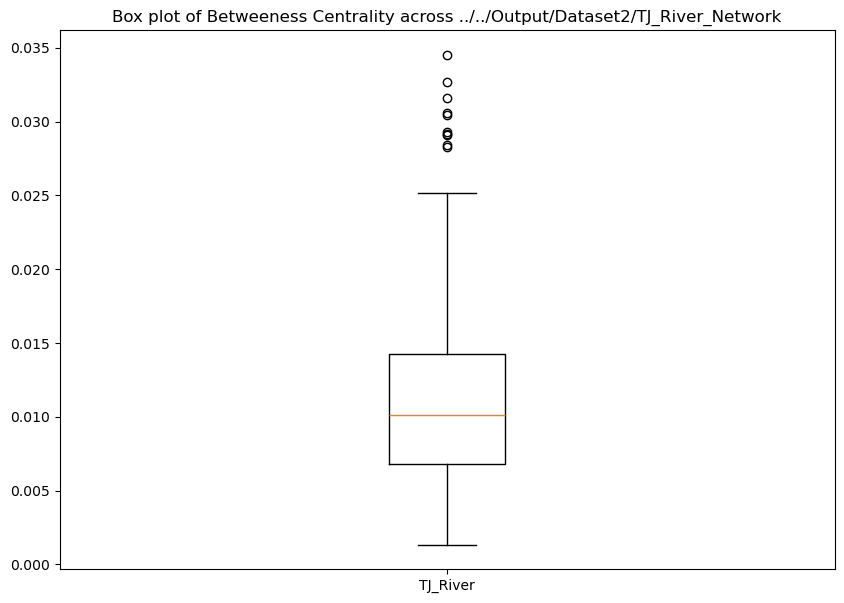

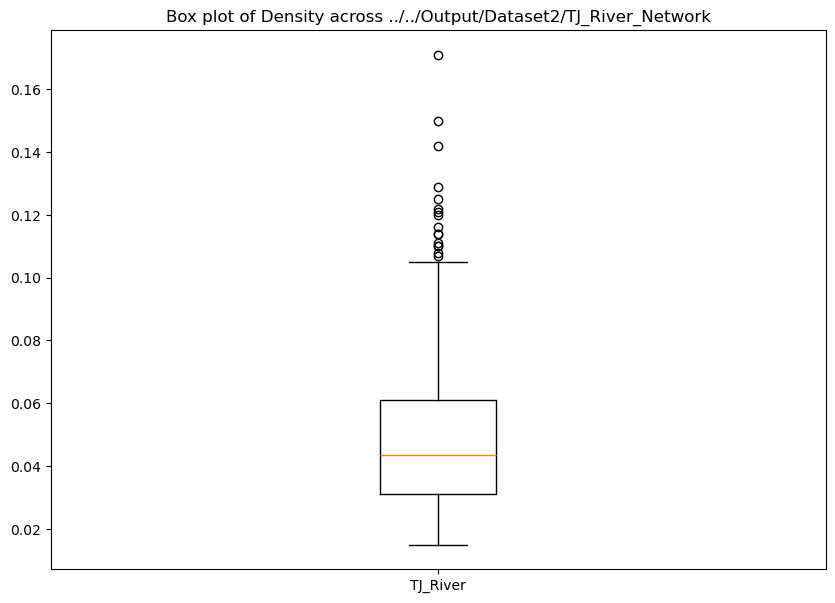

,TJ_River_mean,TJ_River_std
Number of Edges,692.284,351.733
Number of Nodes,174.632,44.253
Average Degree Centrality,0.049,0.024
Transitivity,0.000,0.000
Closeness Centrality,0.195,0.057
Betweeness Centrality,0.011,0.006
Density,0.049,0.024


In [40]:
analyze_network_statistics(project_stats, filename='../../Output/Dataset2/TJ_River_Dataset2_stats.csv', project_name='../../Output/Dataset2/TJ_River_Network')